Feature ranking:
1. feature 4 (0.068626)
2. feature 42 (0.059356)
3. feature 22 (0.059061)
4. feature 3 (0.051926)
5. feature 6 (0.051158)
6. feature 40 (0.049242)
7. feature 17 (0.039271)
8. feature 13 (0.035692)
9. feature 12 (0.034432)
10. feature 9 (0.027885)
11. feature 15 (0.027112)
12. feature 53 (0.024627)
13. feature 25 (0.023954)
14. feature 1 (0.023374)
15. feature 26 (0.022626)
16. feature 21 (0.022110)
17. feature 39 (0.022078)
18. feature 44 (0.020312)
19. feature 43 (0.020165)
20. feature 0 (0.018826)
21. feature 31 (0.018347)
22. feature 24 (0.018307)
23. feature 29 (0.016209)
24. feature 32 (0.015963)
25. feature 30 (0.015012)
26. feature 14 (0.012941)
27. feature 36 (0.012112)
28. feature 11 (0.012102)
29. feature 48 (0.010645)
30. feature 50 (0.010378)
31. feature 35 (0.010217)
32. feature 16 (0.010141)
33. feature 34 (0.009835)
34. feature 27 (0.009237)
35. feature 38 (0.008326)
36. feature 7 (0.007883)
37. feature 47 (0.007866)
38. feature 49 (0.007742)
39. feature

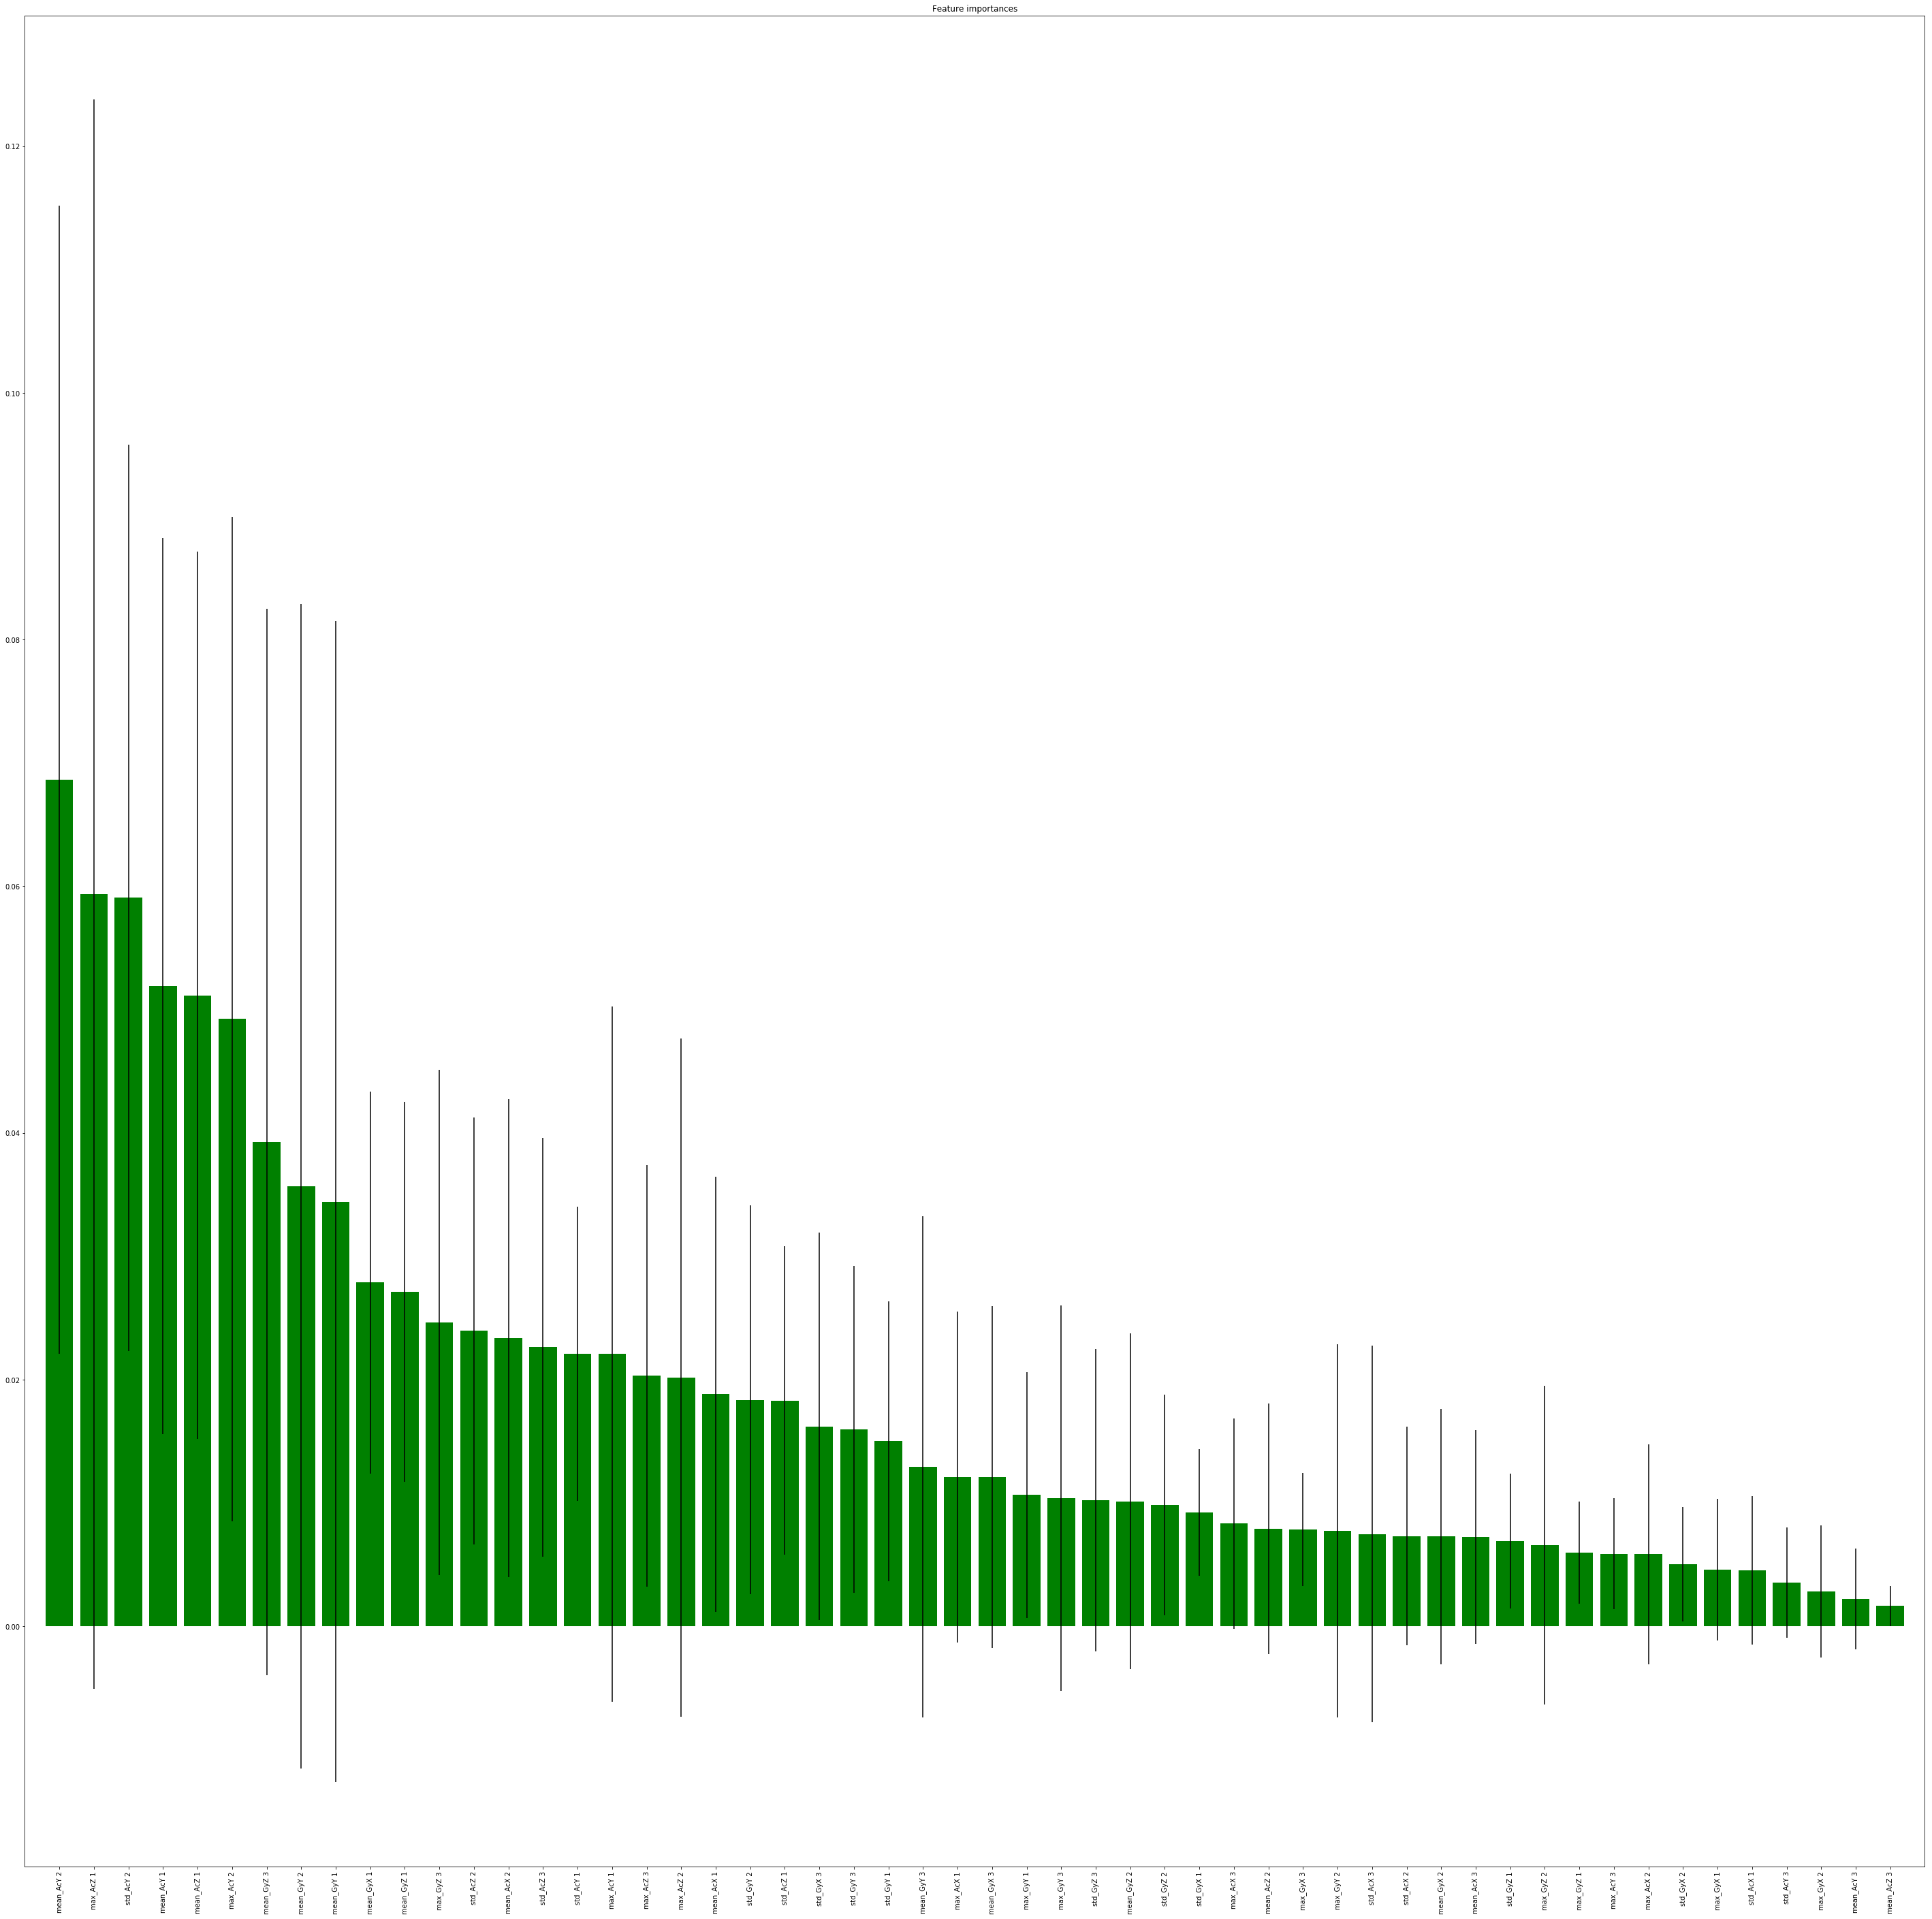

In [23]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
raw_df = pd.read_csv('C:/Users/WEARE1/Downloads/extracted_dataset.csv')
X = raw_df.drop(['activity'],axis = 1 )
y = raw_df['activity'].copy()

# split data train 70 % and test 30 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(n_estimators=60, random_state = 30)      
clr_rf = clf_rf.fit(X_train,y_train)

clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(X_train,y_train)
importances = clr_rf_2.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(50, 50))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()